<a href="https://colab.research.google.com/github/OmarMuhammedAli/python-advanced/blob/main/session%204/parallel_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**parallel programming**

Serial Execution

- Typical programs operate lines sequentially(code is executed one line at a time in order)
 

In [ ]:

import time 

start = time.perf_counter()

def do_sth():
    print ('sleeping 1 sec')
    time.sleep(1)
    print('done sleeping ....')


do_sth()
do_sth()

finish = time.perf_counter()

print (f'finished in {round(finish-start,2)}')

sleeping 1 sec
done sleeping ....
sleeping 1 sec
done sleeping ....
finished in 2.0


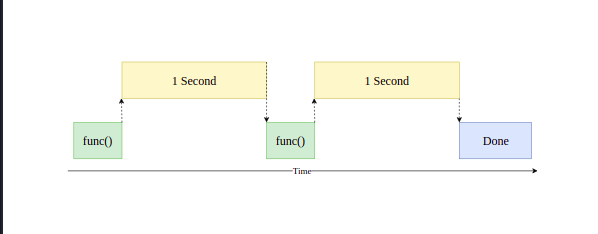

what and when to use multi processing module:

*   speed up our program
*   tasks don't need to run synchronously  (main task can be splited ot multiple task ) 
   
Tasks are 
io- bound or cpu bound 
io: waiting for input, output operation to be completed 
file system operation and network operation like downloading stuff 


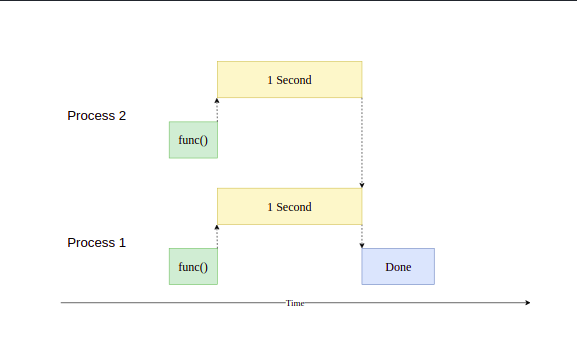

In [ ]:
import multiprocessing # pool
import threading


start = time.perf_counter()



def do_sth(sec,name):
    print (f'hello mr {name }, sleep for  {sec} sec')
    time.sleep(sec)
    print('done sleeping ....')

secs = [1,2,3,4,5,8]
names = ['mona','ali','mohamed',"ahmed",'omar',"aya"]

processes  = []
# create two process object
for sec , name  in zip(secs,names):
    p = multiprocessing.Process(target=do_sth,args=[sec,name])
    # get process to run
    p.start()
    processes.append(p)

for p in processes:
  p.join()

finish = time.perf_counter()

print (f'finished in {round(finish-start,2)}')

hello mr mona, sleep for  1 sec
hello mr ali, sleep for  2 sec
hello mr mohamed, sleep for  3 sec
hello mr ahmed, sleep for  4 sec
hello mr omar, sleep for  5 sec
hello mr aya, sleep for  8 sec
done sleeping ....
done sleeping ....
done sleeping ....
done sleeping ....
done sleeping ....
done sleeping ....
finished in 8.07


threads and process

Tasks's types:


1.   cpu bound (numbers)-> function calculate square root -> process 
2.   io bound (files system - network ) -> download images form web - GUI(waits for user ) -> threading 











In [ ]:
import concurrent.futures
import time

start = time.perf_counter()


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f'Done Sleeping...{seconds}'



with concurrent.futures.ProcessPoolExecutor() as executor:
    secs = [5, 4, 3, 2, 1]
    results = executor.map(do_something, secs)


finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 4 second(s)...
Sleeping 5 second(s)...
Sleeping 3 second(s)...
Sleeping 2 second(s)...
Sleeping 1 second(s)...
Finished in 5.2 second(s)


In [ ]:
import requests 
import time

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

t1 = time.perf_counter()


def download_image(img_url):
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3]
    img_name = f'{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')


for link in img_urls:
  download_image(link)

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1564135624576-c5c88640f235.jpg was downloaded...
photo-1541698444083-023c97d3f4b6.jpg was downloaded...
photo-1522364723953-452d3431c267.jpg was downloaded...
photo-1513938709626-033611b8cc03.jpg was downloaded...
photo-1507143550189-fed454f93097.jpg was downloaded...
photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
photo-1504198453319-5ce911bafcde.jpg was downloaded...
photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
photo-1516972810927-80185027ca84.jpg was downloaded...
photo-1550439062-609e1531270e.jpg was downloaded...
photo-1549692520-acc6669e2f0c.jpg was downloaded...
Finished in 2.052089225002419 seconds


In [ ]:
import requests 
import time
import concurrent.futures

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

t1 = time.perf_counter()


def download_image(img_url):
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3]
    img_name = f'{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')


with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(download_image, img_urls)


t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1507143550189-fed454f93097.jpg was downloaded...
photo-1564135624576-c5c88640f235.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1513938709626-033611b8cc03.jpg was downloaded...
photo-1522364723953-452d3431c267.jpg was downloaded...
photo-1504198453319-5ce911bafcde.jpg was downloaded...
photo-1516972810927-80185027ca84.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
photo-1549692520-acc6669e2f0c.jpg was downloaded...
photo-1541698444083-023c97d3f4b6.jpg was downloaded...
photo-1550439062-609e1531270e.jpg was downloaded...
photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
Finished in 1.3238623889992596 seconds


In [ ]:


import time
import concurrent.futures
from PIL import Image

img_names = [
    'photo-1516117172878-fd2c41f4a759.jpg',
    'photo-1532009324734-20a7a5813719.jpg',
    'photo-1524429656589-6633a470097c.jpg',
    'photo-1530224264768-7ff8c1789d79.jpg',
    'photo-1564135624576-c5c88640f235.jpg',
    'photo-1541698444083-023c97d3f4b6.jpg',
    'photo-1522364723953-452d3431c267.jpg',
    'photo-1513938709626-033611b8cc03.jpg',
    'photo-1507143550189-fed454f93097.jpg',
    'photo-1493976040374-85c8e12f0c0e.jpg',
    'photo-1504198453319-5ce911bafcde.jpg',
    'photo-1530122037265-a5f1f91d3b99.jpg',
    'photo-1516972810927-80185027ca84.jpg',
    'photo-1550439062-609e1531270e.jpg',
    'photo-1549692520-acc6669e2f0c.jpg'
]

t1 = time.perf_counter()

size = (800, 800)


def process_image(img_name):
    img = Image.open(img_name)

    img = img.rotate(angle=180)

    #img.thumbnail(size)
    img.save(f'processed/{img_name}')
    print(f'{img_name} was processed...')


with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(process_image, img_names)


t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

Finished in 4.4755226760025835 seconds


* cool sources 


1. [difference between process and thread](https://alldifferences.net/difference-between-process-and-thread/)
2. [threads](https://youtu.be/IEEhzQoKtQU)
2. [multiprocessing](https://youtu.be/fKl2JW_qrso)
3. [gamed bs bir8i kter f 7agat mn3rfhash bs l concept wade7 XD](https://youtu.be/AG1soUh4-nU)

